# constructing 2D/3D local box using GeoPoints.jl 

Nobuaki Fuji (IPGP/UPC/IUF) December 2025

you can also see how to use lazyProduceOrLoad, which is not safe solution but when debugging, it's cool! (but don't write a biiiig jdl2 neither!)

In [1]:
using Pkg

cd(@__DIR__)
Pkg.activate("../")
ParamFile = "../config/testparam.csv"

include("../src/commonBatchs.jl")
include("../src/planet1D.jl")
include("../src/GeoPoints.jl")

using .commonBatchs, .planet1D, .GeoPoints

  Activating 

  1.928305 seconds (3.84 M allocations: 173.763 MiB, 1.06% gc time, 99.93% compilation time)


project at `~/Documents/Github/flexOPT`


In [2]:
set_default_planet!(:Earth) # if you wish to go to other telluric bodies, otherwise this is not necessary

Ellipsoid(Earth)

In [3]:
# two (extreme) points that can define the slice (or the x-y local plane for 3D box)
p1 = GeoPoint(48.8566,2.3522) # Paris (latitude, longitude)
p2 = GeoPoint(42.8,1.5) # Tarascon (à peu près)


Δx = 100.0 # in metre
Δz = 100.0

altMax = 20.e3 # in metre
altMin = -100.e3 # in metre

-100000.0

In [4]:
@show p1 # GeoPoint has some attributes

p1 = GeoPoint(48.8566, 2.3522, 0.0, [4.200914795649138e6, 172559.77631070156, 4.780081341967356e6], 6.366053693814456e6)


GeoPoint(48.8566, 2.3522, 0.0, [4.200914795649138e6, 172559.77631070156, 4.780081341967356e6], 6.366053693814456e6)

In [5]:
# make a box/rectangle

allGridsInGeoPoints, allGridsInCartesian, effectiveRadii=constructLocalBox(p1,p2,Δx,Δz,altMin,altMax)
#allGridsInGeoPoints, allGridsInCartesian, effectiveRadii=lazyProduceOrLoad("boxGrids",constructLocalBox,p1,p2,Δx,Δz,altMin,altMax) <- don't do this, it's too heavy


(GeoPoint[GeoPoint(48.907887632772656, 2.359796896592829, -99838.236349905, [4.1310335068414416e6, 170237.94705026117, 4.708588583009119e6], 6.266197031478216e6) GeoPoint(48.90783553005014, 2.3597891713586034, -99738.40068796469, [4.1311033881302495e6, 170240.2688795216, 4.708660075768077e6], 6.266296885857039e6) … GeoPoint(48.84658480113155, 2.350718261091315, 19868.412401470814, [4.21482117212187e6, 173021.8203335292, 4.794308401000045e6], 6.3859257047962835e6) GeoPoint(48.8465346306368, 2.350710839849349, 19968.254166095423, [4.214891053410677e6, 173024.14216278965, 4.794379893759004e6], 6.3860255645881295e6); GeoPoint(48.90698048711516, 2.3596539064577184, -99843.96616668951, [4.1311049434455377e6, 170230.5636253266, 4.708518996396675e6], 6.26619163750844e6) GeoPoint(48.90692839876675, 2.359646183774253, -99744.1304135474, [4.131174824734345e6, 170232.88545458706, 4.708590489155632e6], 6.266291491973217e6) … GeoPoint(48.845694570202916, 2.350578265495784, 19862.789894269616, [4.214

In [6]:
allGridsInCartesian[20,30]

localCoord2D(Integer[20, 30], [1900.0, -97100.0], [0.9985613843374025, 0.05362053440772882], [-0.05362053440772882, 0.9985613843374025])

In [7]:
#seismicModel=getParamsAndTopo(allGridsInGeoPoints,effectiveRadii,2.0) # this can be also GPUed
#seismicModel=lazyProduceOrLoad("seismicModel",getParamsAndTopo,allGridsInGeoPoints,effectiveRadii,2.0)
seismicModel=lazyProduceOrLoad("seismicModel") # this is the laziest way to load

This is the laziest ProduceOrLoad
Loading from ./tmp/seismicModel.jld2


(ρ = [3.3725411830199197 3.3725520415888193 … 0.0 0.0; 3.372540560394905 3.372551418973144 … 0.0 0.0; … ; 3.372294819306954 3.372305677881151 … 0.0 0.0; 3.3722953694174183 3.3723062279822686 … 0.0 0.0], Vpv = [7.936501067356701 7.936614263703209 … 0.0 0.0; 7.936494576733715 7.9366077731775775 … 0.0 0.0; … ; 7.933932821718081 7.934046018119805 … 0.0 0.0; 7.933938556405154 7.934051752709441 … 0.0 0.0], Vph = [8.135589067359291 8.135661476637637 … 0.0 0.0; 8.135584915446788 8.13565732478741 … 0.0 0.0; … ; 8.133946215632685 8.134018624946352 … 0.0 0.0; 8.133949883989176 8.134022293240514 … 0.0 0.0], Vsv = [4.413419311905491 4.413396293119483 … 0.0 0.0; 4.41342063179139 4.413397612985585 … 0.0 0.0; … ; 4.413941571665586 4.41391855286835 … 0.0 0.0; 4.413940405501318 4.413917386723897 … 0.0 0.0], Vsh = [4.544031640720238 4.54412130703096 … 0.0 0.0; 4.544026499297962 4.544116165685802 … 0.0 0.0; … ; 4.541997254288626 4.5420869206430865 … 0.0 0.0; 4.542001796910794 4.542091463188072 … 0.0 0.0],

In [8]:
Nx,Nz=size(seismicModel.ρ)

(6761, 1201)

In [9]:
maximum(seismicModel.ρ)

3.3807231008674763

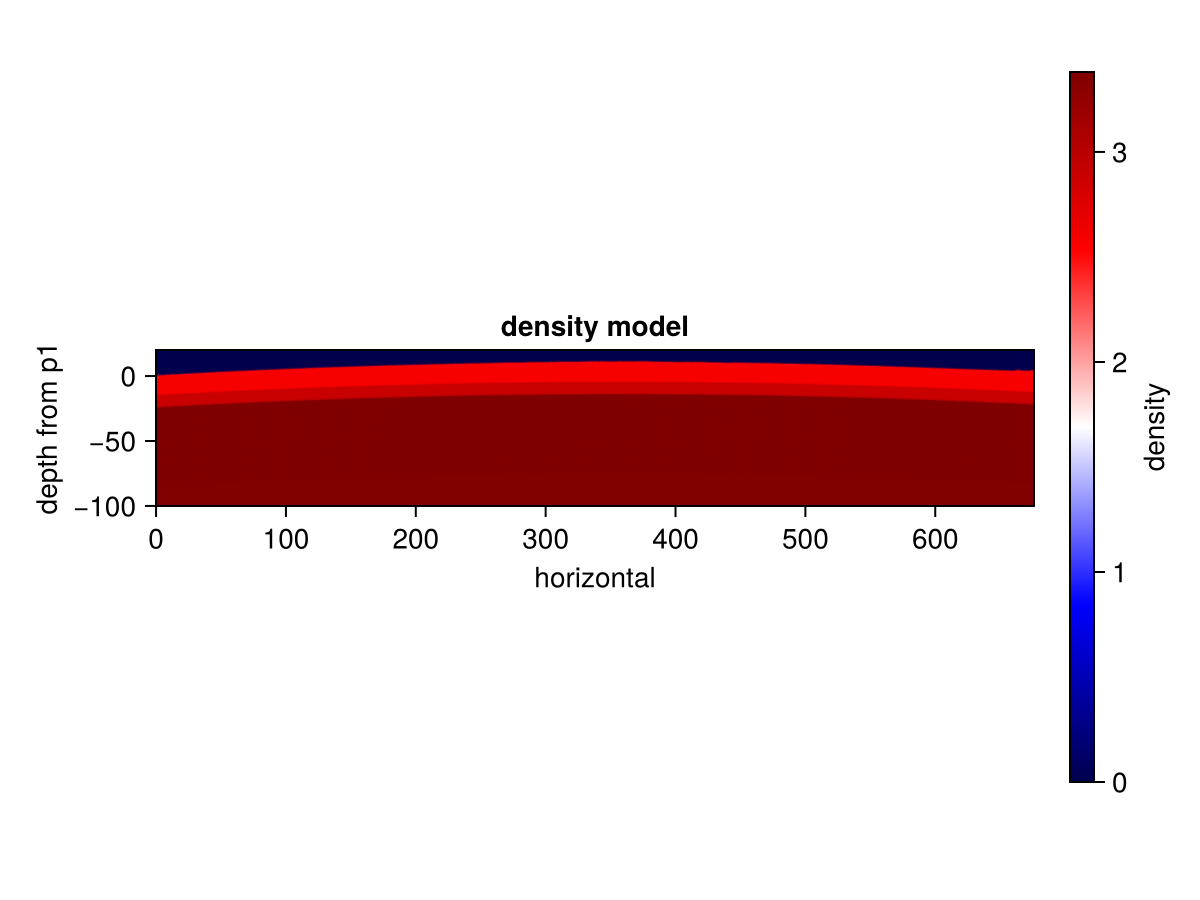

In [10]:
using CairoMakie
fig, ax, hm = heatmap(
    #topo.x,topo.y,topo.z';
    collect((0:1:(Nx-1)).*Δx).*1.e-3,(collect(0:1:(Nz-1)).*Δz.+altMin).*1.e-3, seismicModel.ρ;
    colormap = :seismic,
    #colorrange=(0,4),
    axis = (aspect = DataAspect(), xlabel = "horizontal", ylabel = "depth from p1", title = "density model")
)
Colorbar(fig[1,2], hm, label="density")
fig

# 3D box ? yes

In [11]:
p1 = GeoPoint(48.8566,2.3522) # Paris (latitude, longitude)
p2 = GeoPoint(42.8,1.5) # Tarascon (à peu près)


Δx = 500.0 # in metre
Δy = 500.0
Δz = 500.0

altMax = 20.e3 # in metre
altMin = -100.e3 # in metre

horizontalDepth = 50.e3

50000.0

In [12]:

allGridsInGeoPoints3D, allGridsInCartesian3D, effectiveRadii3D=constructLocalBox(p1,p2,Δx,Δy,Δz,-horizontalDepth,horizontalDepth,altMin,altMax)

#ok 3D box version needs to be GPUed

(GeoPoint[GeoPoint(48.953024700409834, 1.6699999617332328, -99622.04780035623, [4.1292020409103264e6, 120387.9366562769, 4.711997717248603e6], 6.266396511337789e6) GeoPoint(48.95259378281589, 1.6769036925297778, -99626.17689891247, [4.1292203555696374e6, 120886.43676021673, 4.7119636259062085e6], 6.266392541750509e6) … GeoPoint(48.859144501936626, 3.0414217074040906, -99660.77110633299, [4.132846658113246e6, 219589.45734030558, 4.705213540112029e6], 6.266392541750509e6) GeoPoint(48.858631622728055, 3.048299688382775, -99656.99140021697, [4.132864972772557e6, 220087.95744424543, 4.705179448769635e6], 6.266396511337789e6); GeoPoint(48.9484852511813, 1.6693438244564294, -99650.68116192236, [4.129559223930806e6, 120351.0195316042, 4.711649784186381e6], 6.266369558259221e6) GeoPoint(48.94805436757178, 1.6762469656530674, -99654.81026827118, [4.129577538590117e6, 120849.51963554403, 4.711615692843987e6], 6.266365588654867e6) … GeoPoint(48.854613017100924, 3.0406490506728523, -99689.402244790

In [13]:
#seismicModel3D=getParamsAndTopo(allGridsInGeoPoints3D,effectiveRadii3D,2.0)
seismicModel3D=lazyProduceOrLoad("seismicModel3D",getParamsAndTopo,allGridsInGeoPoints3D,effectiveRadii3D,2.0)
#seismicModel3D=lazyProduceOrLoad("seismicModel3D")

Loading from ./tmp/seismicModel3D.jld2


(ρ = [3.372564668110668 3.3725642192835092 … 3.3725605156218705 3.3725609270406616; 3.372561556683719 3.3725611078558932 … 3.3725574044509328 3.372557815872983; … ; 3.3723159275235273 3.372315480399884 … 3.372312145104348 3.3723125585402665; 3.3723186761126236 3.372318228992166 … 3.3723148939837717 3.372315307419404;;; 3.372618959231797 3.372618510438966 … 3.372614806790639 3.3726152181752362; 3.37261584803816 3.372615399244662 … 3.3726116958529944 3.3726121072408506; … ; 3.3723702188710862 3.372369771781651 … 3.3723664364709105 3.3723668498724675; 3.372372967226693 3.372372520140443 … 3.372369185116821 3.3723695985180924;;; 3.3726732503658123 3.372672801607303 … 3.3726690979722855 3.3726695093226957; 3.3726701394054497 3.372669690646274 … 3.3726659872678972 3.3726663986215657; … ; 3.372424510231501 3.3724240631762683 … 3.3724207278503258 3.3724211412175262; 3.372427258353655 3.372426811301607 … 3.3724234762627594 3.3724238896296743;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.

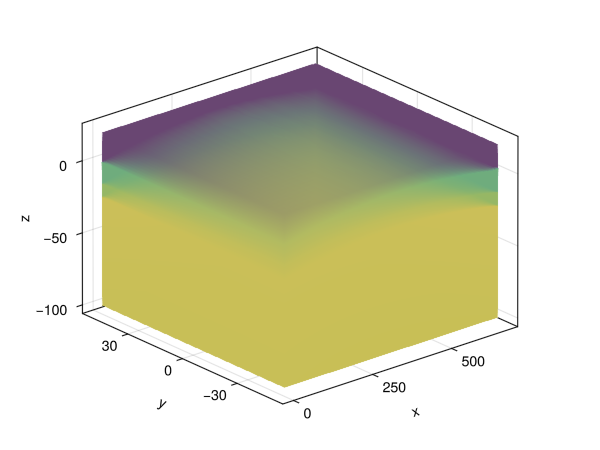

In [14]:
using GLMakie
GLMakie.activate!()
Makie.inline!() 
Nx3D,Ny3D,Nz3D=size(allGridsInCartesian3D)

x = (0:Nx3D-1) .* Δx .* 1e-3
y = (0:Ny3D-1) .* Δy .* 1e-3 .- horizontalDepth*1.e-3
z = (0:Nz3D-1) .* Δz .* 1e-3 .+ altMin*1.e-3
A = seismicModel3D.Vpv

f = Figure()
ax = Axis3(f[1, 1])

volume!(ax,
    x[1] .. x[end],
    y[1] .. y[end],
    z[1] .. z[end],
    seismicModel3D.Vpv,
    algorithm = :absorption,   # optional, makes it nicer
    colormap = :viridis
)
f

# another way of importing model parameters

## we can read images or cartoons

In [15]:
modelName="marmousi"
imageFile="../dataInput/model/random/marmousi.png"
modelDefinitionMethod="2DimageFile" # ToyModel or 2DimageFile (or 1DsphericalPlanet)
model=defineModel(imageFile)

676×802 Matrix{Float64}:
 0.0       0.0       0.0       0.0       …  0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0       …  0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 ⋮                                       ⋱            ⋮         
 0.550062  0.550062  0.550062  0.556929     0.666012  0.666012  0.666012
 0.550062  0.550062  0.550062  0.557909     0.666012  0.666012  0.666012
 0.550062  0.550062  0.550062  0.557909     0.666012  0.666012  0.666012
 0.550062  

model construction 

In [16]:
seismicModelMarmousi = initiateSeismicModel(model)

(ρ = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Vpv = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Vph = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Vsv = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Vsh = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Qμ = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Qκ = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], QμPower = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], QκPower = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], η = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

# now construction of OPT operators

# Let's go to Mars

In [29]:
set_default_planet!(:Mars)


Ellipsoid(Mars)

# ok i need to change how to call 1D planet models too (because it is already called by DSM1D and it is not very much flexible but here I just use the same params as Earth)

In [30]:
p1 = GeoPoint(15.0,135.0) # we should see Elysium planitia at least
p2 = GeoPoint(15.0,180.0) # 

GeoPoint(15.0, 180.0, 0.0, [-3.281768413646896e6, 0.0, 869020.2487787417], 3.3948785123473755e6)

In [31]:
Δx = 3.e3 # in metre
Δy = 3.e3
Δz = 3.e3

horizontalDepthMin = -1000.e3
horizontalDepthMax = 1000.e3


altMax = 100.e3 # in metre
altMin = -600.e3 # in metre



-600000.0

In [32]:
allGridsInGeoPoints, allGridsInCartesian, effectiveRadii=constructLocalBox(p1,p2,Δx,Δy,Δz,horizontalDepthMin,horizontalDepthMax,altMin,altMax)

(GeoPoint[GeoPoint(-4.963653321425992, 132.80185665942892, -379373.71227101434, [-2.0422418899470621e6, 2.2052772739627166e6, -257588.98781908385], 3.0166789485718627e6) GeoPoint(-4.909597180901, 132.79527125283124, -380370.0400157871, [-2.041478231301609e6, 2.204960956194747e6, -254705.1070062049], 3.015685805709315e6) … GeoPoint(33.761713917581346, 127.56589367035907, -375066.6186233803, [-1.534408890720767e6, 1.99492595826258e6, 1.660191752745397e6], 3.0150251870849505e6) GeoPoint(33.81509473819276, 127.55650097800321, -374058.11040834157, [-1.5336452320753138e6, 1.9946096404946097e6, 1.6630756335582756e6], 3.0160165581038576e6); GeoPoint(-4.9657392787162955, 132.85383473591983, -380621.2905938573, [-2.0433899402441573e6, 2.202505635365183e6, -257588.98781908385], 3.015431247492151e6) GeoPoint(-4.911661691140075, 132.8472595811561, -381618.03198251064, [-2.0426262815987044e6, 2.2021893175972127e6, -254705.1070062049], 3.014437693559459e6) … GeoPoint(33.777597418131904, 127.625114830

In [33]:
Nx,Ny,Nz=size(allGridsInCartesian)

(838, 667, 234)

In [34]:
seismicModel=getParamsAndTopo(allGridsInGeoPoints,2.0)

MethodError: MethodError: no method matching getParamsAndTopo(::Array{GeoPoint, 3}, ::Float64)
The function `getParamsAndTopo` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  getParamsAndTopo(::Any, ::Any, !Matched::Float64; NradiusNodes, eps, VpWater, ρWater, VpAir, ρAir, hasAirModel)
   @ Main.GeoPoints ~/Documents/Github/flexOPT/src/GeoPoints/getSeismicParamTopo.jl:25


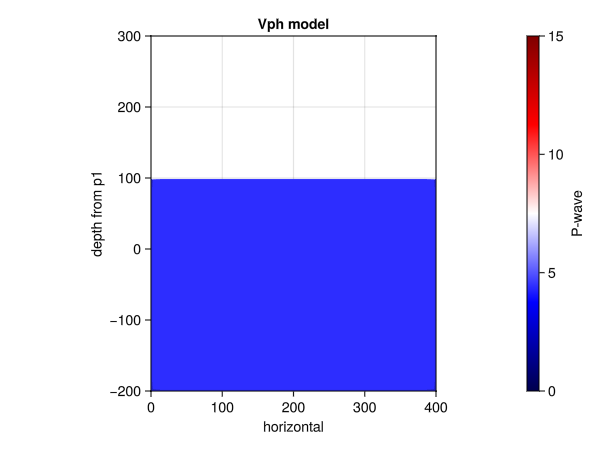

In [35]:
using CairoMakie
fig, ax, hm = heatmap(
    #topo.x,topo.y,topo.z';
    collect((0:1:(Nx-1)).*Δx).*1.e-3,(collect(0:1:(Nz-1)).*Δz.+altMin).*1.e-3, seismicModel.Vsv[:,(Ny÷6)*1,:];
    colormap = :seismic,
    colorrange=(0,15),
    axis = (aspect = DataAspect(), xlabel = "horizontal", ylabel = "depth from p1", title = "Vph model")
)
ylims!(ax,-200,300)
xlims!(ax,0,400)
Colorbar(fig[1,2], hm, label="P-wave")
fig